In [1]:
#Packages related to general operating system & warnings
import gc
import os 
import warnings
warnings.filterwarnings('ignore')



## EDA and DV Modules

In [2]:

from pandas_profiling import ProfileReport

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

#from matplotlib.backends.backend_pdf import PdfPage
# Notebook configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<Figure size 432x216 with 0 Axes>

## Data preparation and preprocessing modules

In [3]:
#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import imblearn 

## Feature Engineering modules

In [4]:
#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

## Modelling modules

In [6]:
#Modules related key techniques of supervised learning and metrics
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#export_graphviz
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC,SVC

from sklearn.metrics import confusion_matrix
#Module related to calculation of metrics
from sklearn import metrics

## Saving the models

In [7]:
#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

import pickle

In [8]:
#Changing the directory to data folder
%cd ../input/cycbersecurity-network-intrusion-dataset

/kaggle/input/cycbersecurity-network-intrusion-dataset


# 1.Data Prep

In [9]:
at_buffer = pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv',)
at_FTP = pd.read_csv('Data_of_Attack_Back_FTPWrite.csv',header = None)
at_gpass =pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
at_Neptune = pd.read_csv('Data_of_Attack_Back_Neptune.csv')
at_NMap = pd.read_csv('Data_of_Attack_Back_NMap.csv')
normal  = pd.read_csv('Data_of_Attack_Back_Normal.csv')
at_portsweep = pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
at_rootkit = pd.read_csv('Data_of_Attack_Back_RootKit.csv')
at_satan = pd.read_csv('Data_of_Attack_Back_Satan.csv')

In [10]:
#Creating a new feature of attack_type
at_buffer['attack'] = 'Buffer_overflow'
at_FTP['attack'] = 'FTPWrite'
at_gpass['attack'] = 'GuessPassword'
at_Neptune['attack'] = 'Neptune'
at_NMap['attack'] = 'NMap'
normal['attack'] = 'Normal'
at_portsweep['attack'] = 'Back_PortSweep'
at_rootkit['attack'] = 'RootKit'
at_satan['attack'] = 'Satan'


In [11]:
at_FTP.columns = normal.columns

In [12]:
#combining all datasets to one
data = pd.concat([at_buffer,at_FTP,at_gpass,at_Neptune,at_NMap,at_portsweep,at_rootkit,at_satan,normal],axis=0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813576 entries, 0 to 576709
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      813576 non-null  float64
 1    protocol_type                813576 non-null  float64
 2    service                      813576 non-null  float64
 3    flag                         813576 non-null  float64
 4    src_bytes                    813576 non-null  float64
 5    dst_bytes                    813576 non-null  float64
 6    land                         813576 non-null  int64  
 7    wrong_fragment               813576 non-null  int64  
 8    urgent                       813576 non-null  float64
 9    hot                          813576 non-null  float64
 10   num_failed_logins            813576 non-null  float64
 11   logged_in                    813576 non-null  float64
 12   num_compromised              813576 non-nul

In [14]:
data.columns = data.columns.str.replace(" ","")

In [15]:
data.attack.unique()

array(['Buffer_overflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap',
       'Back_PortSweep', 'RootKit', 'Satan', 'Normal'], dtype=object)

In [16]:
#Creating a binary flag and multinomial flag of attack
#Multinomial attack flags are
dim = {'Normal' :0,'Buffer_overflow':1,'FTPWrite':2,'GuessPassword':3,'Neptune':4,'NMap':5,'Back_PortSweep':6,'RootKit':7,'Satan':8}

data['attack_B'] = np.where(data['attack']=='Normal',0,1)
data['attack_M'] = data['attack'].map(dim)

In [17]:
#dropping attack 
data.drop(columns = ['attack'],inplace =True)

In [18]:
del [[at_buffer,at_FTP,at_gpass,at_Neptune,at_NMap,at_portsweep,at_rootkit,at_satan,normal]]
gc.collect()

116

# EDA and Data Preprocessing

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813576 entries, 0 to 576709
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     813576 non-null  float64
 1   protocol_type                813576 non-null  float64
 2   service                      813576 non-null  float64
 3   flag                         813576 non-null  float64
 4   src_bytes                    813576 non-null  float64
 5   dst_bytes                    813576 non-null  float64
 6   land                         813576 non-null  int64  
 7   wrong_fragment               813576 non-null  int64  
 8   urgent                       813576 non-null  float64
 9   hot                          813576 non-null  float64
 10  num_failed_logins            813576 non-null  float64
 11  logged_in                    813576 non-null  float64
 12  num_compromised              813576 non-null  float64
 13 

In [20]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [21]:
#Creating ProfileReport using pandas profiling
#report = ProfileReport(data)
#report.to_file("report.html")

In [22]:
data.shape

(813576, 43)

In [23]:
for i in data.columns:
    if (data[i].dtype == int) and len:
        print(i,data[i].unique())

land [0]
wrong_fragment [0]
num_outbound_cmds [0]
attack_B [1 0]
attack_M [1 2 3 4 5 6 7 8 0]


In [24]:
#separating numerical and binary variables

cat_col = ['attack_B','attack_M']
constant = ['land','wrong_fragment','num_outbound_cmds']
num_cols = list(set(data.columns)-set(cat_col)-set(constant))

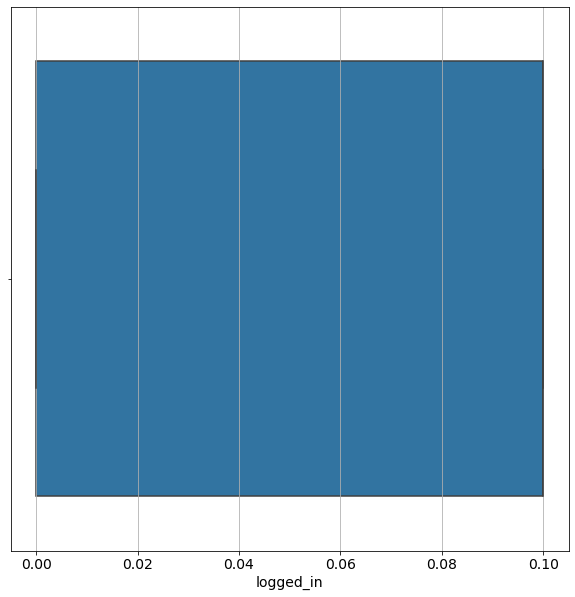

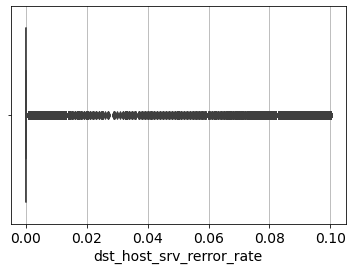

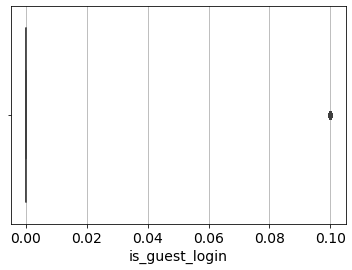

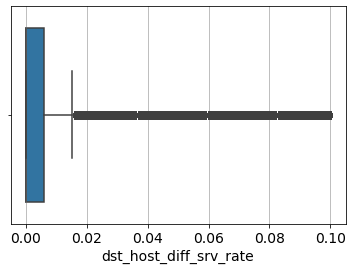

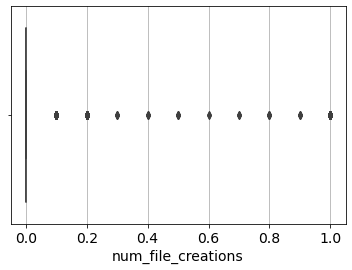

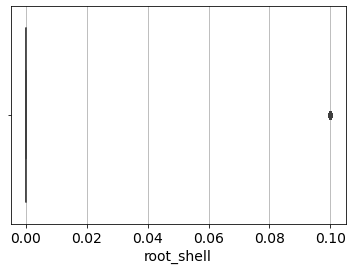

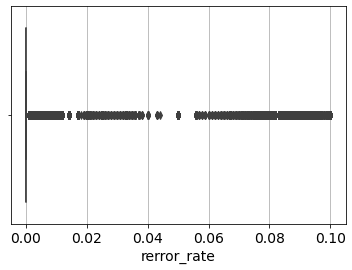

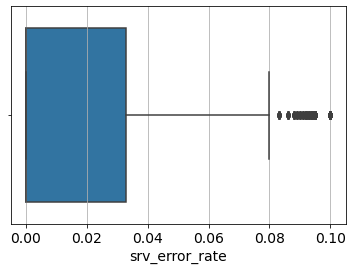

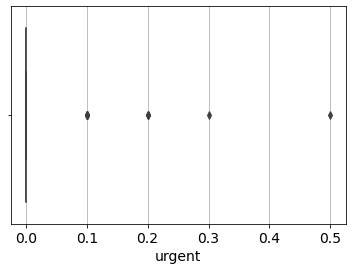

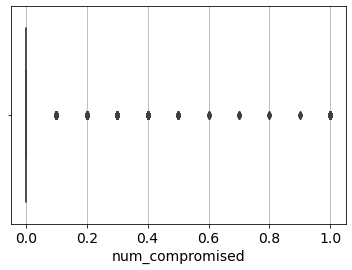

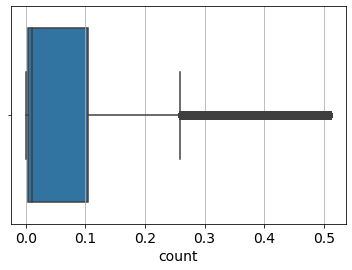

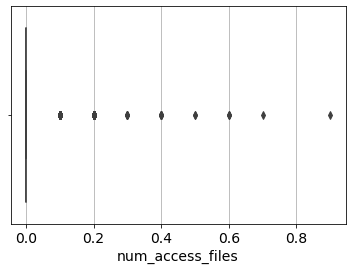

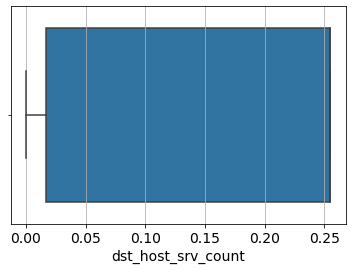

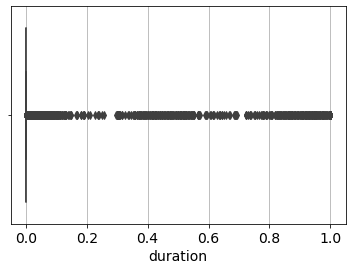

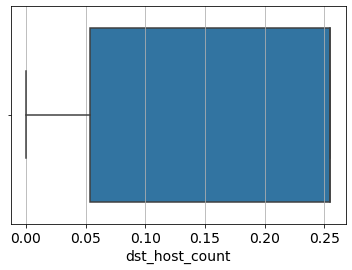

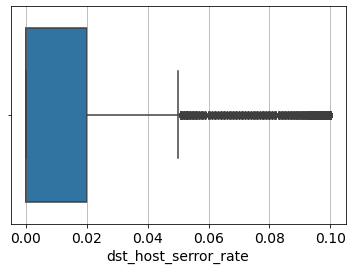

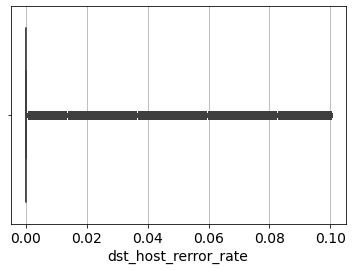

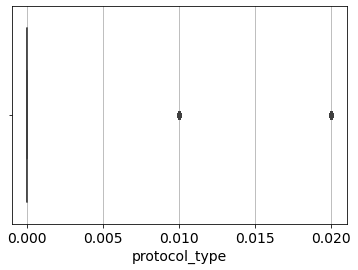

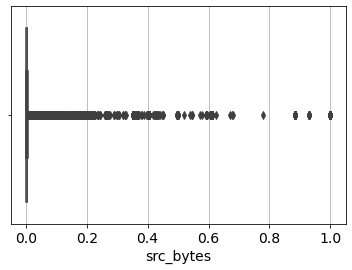

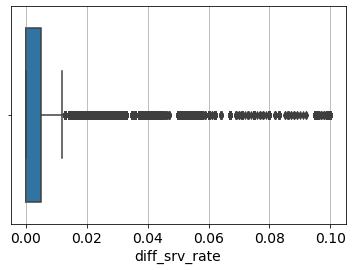

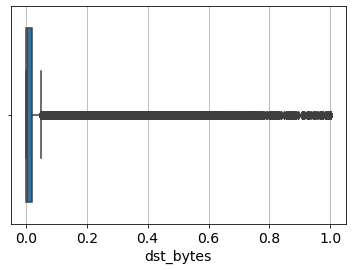

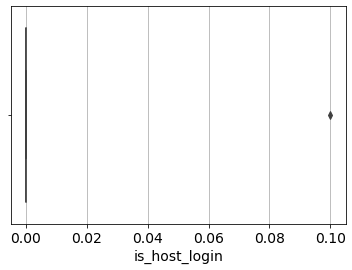

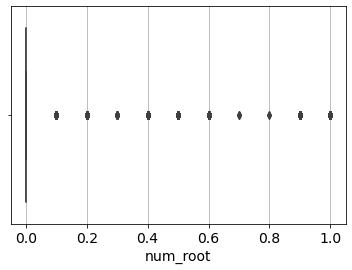

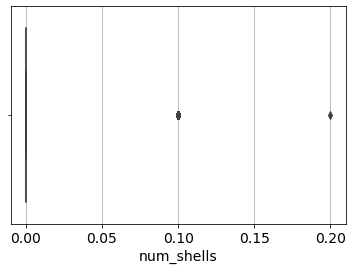

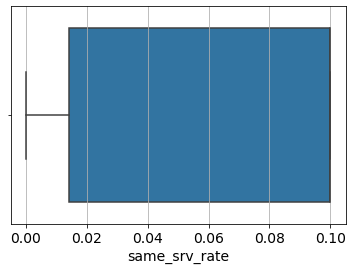

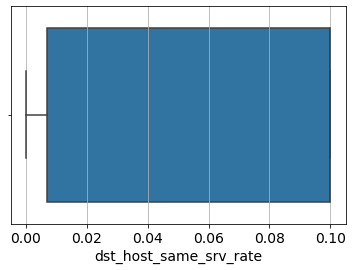

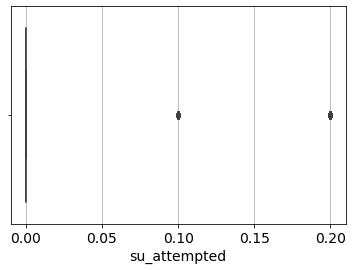

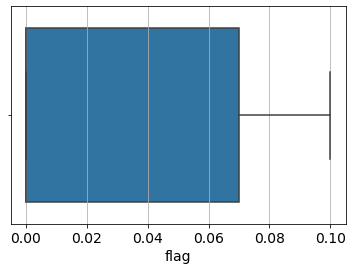

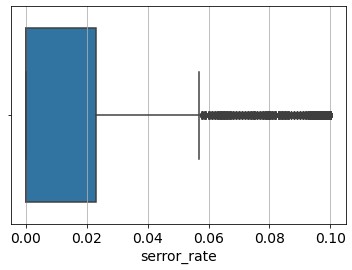

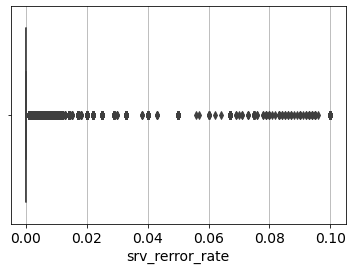

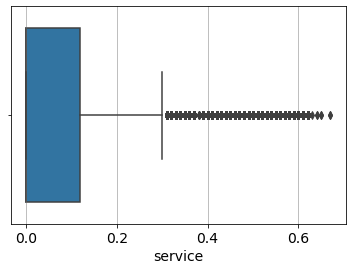

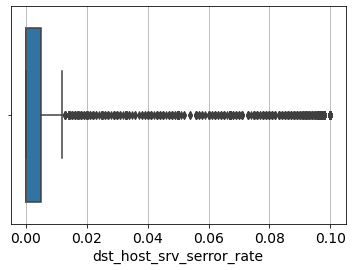

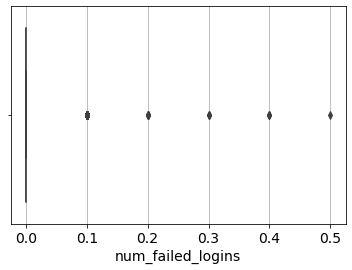

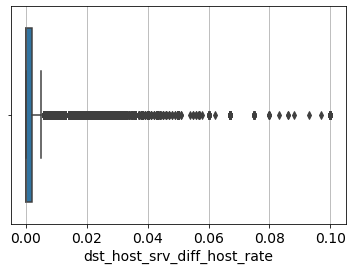

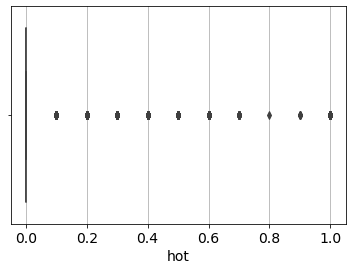

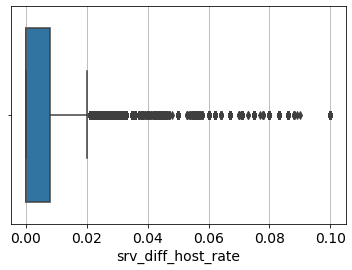

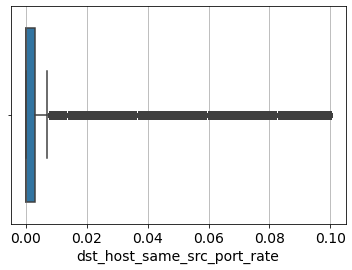

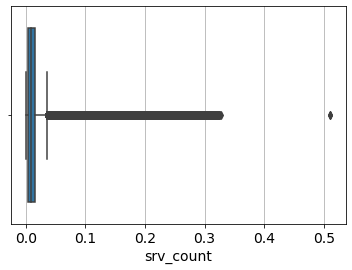

In [25]:
#Detecting outliers in the data
plt.figure(figsize = (10,10))
for i_var in data[num_cols].columns:
    sns.boxplot(data[i_var])
    plt.show()


In [26]:
#Outlier treatement for all varaiables
def Outlier(x):
        x.clip(lower = np.quantile(x,0.01),upper =np.quantile(x,0.99),inplace= True)
        return x

In [27]:
data[num_cols]=data[num_cols].apply(Outlier)

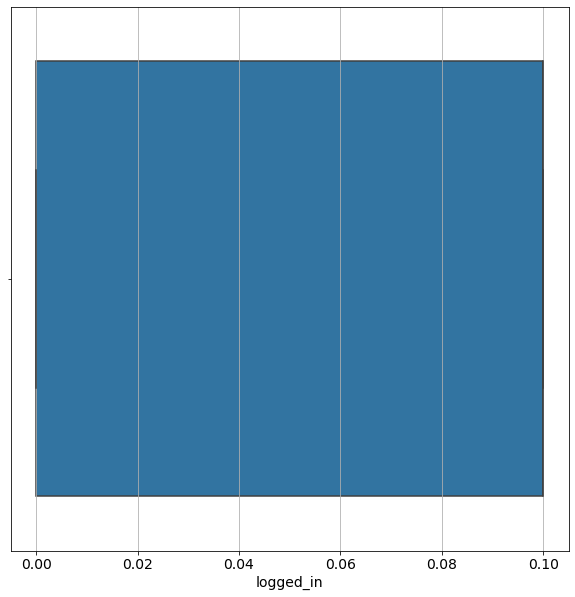

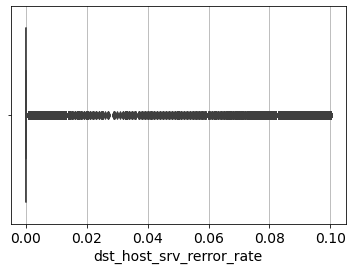

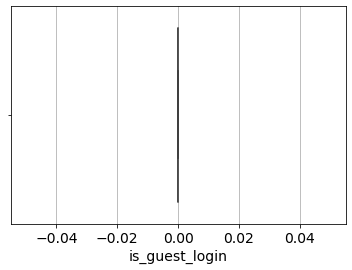

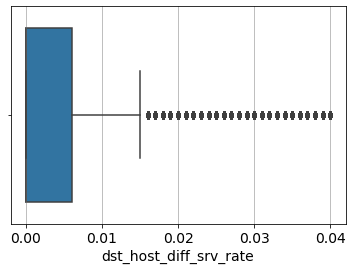

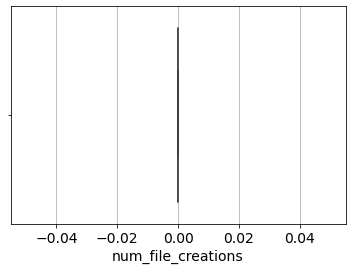

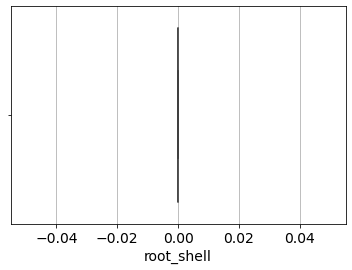

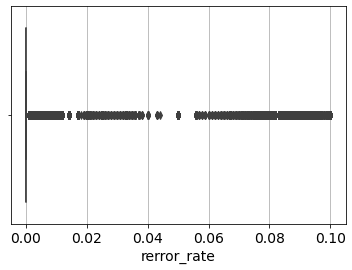

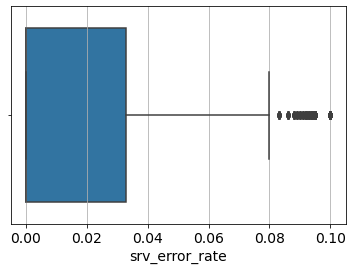

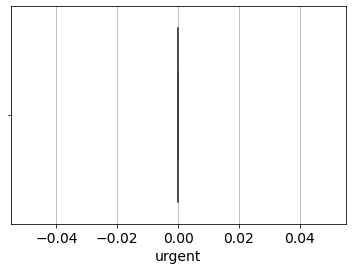

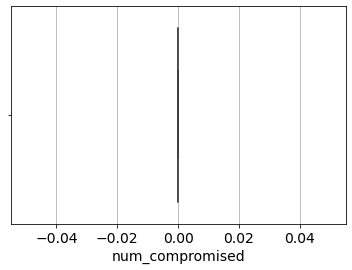

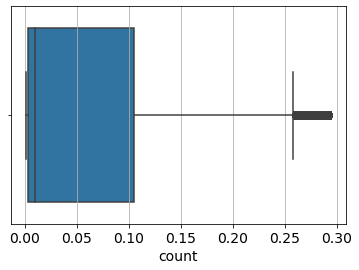

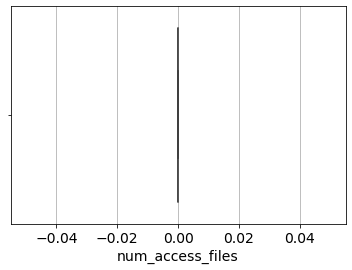

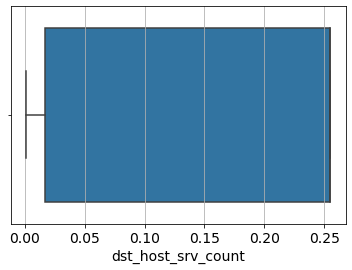

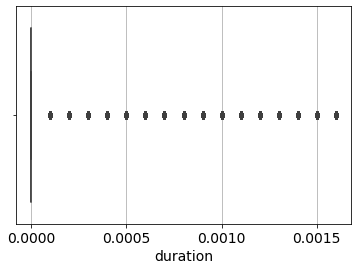

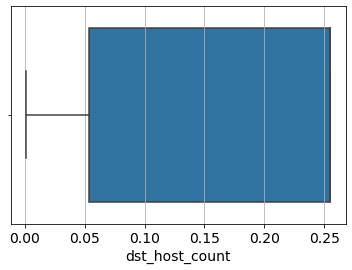

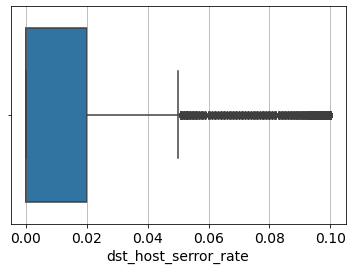

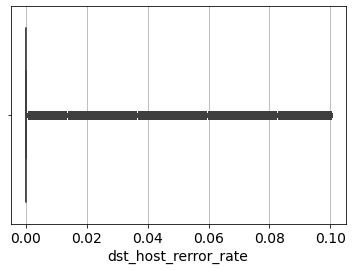

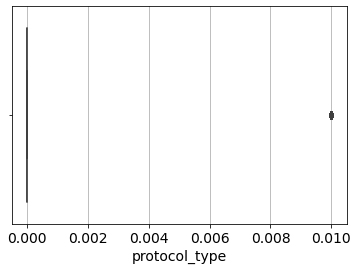

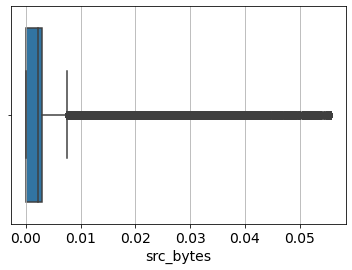

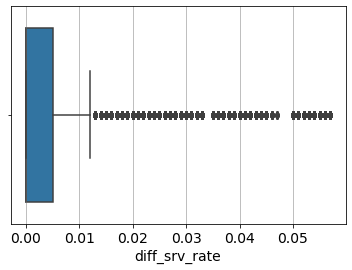

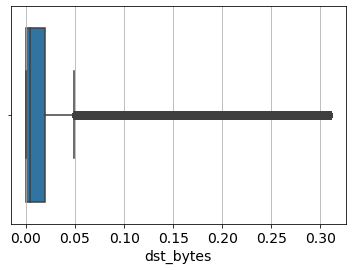

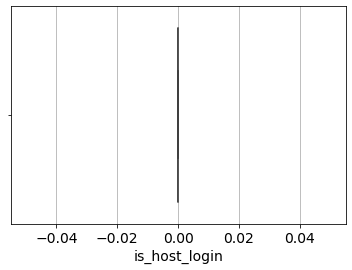

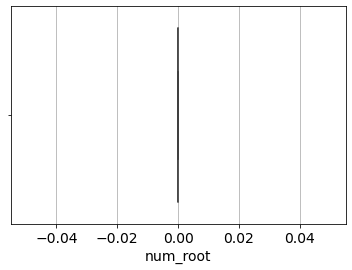

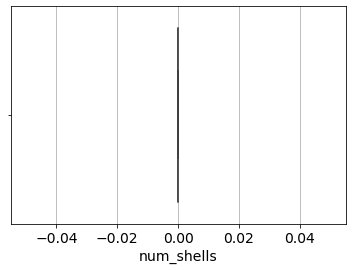

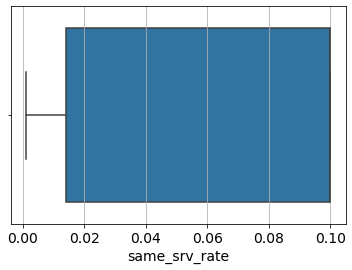

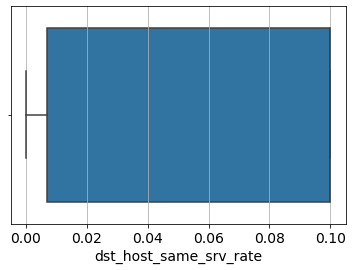

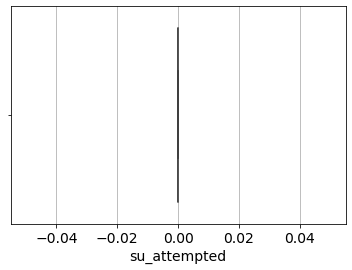

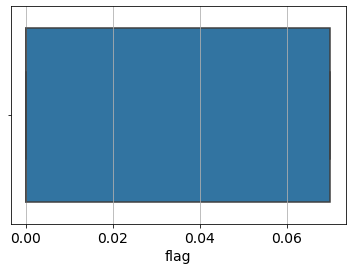

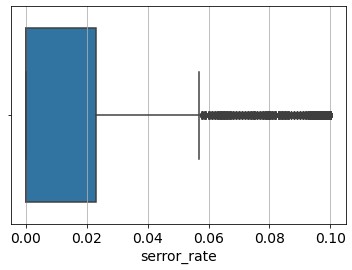

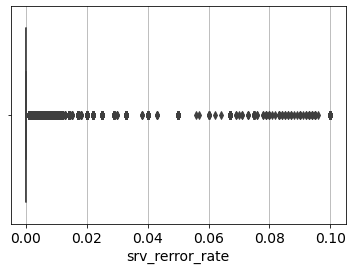

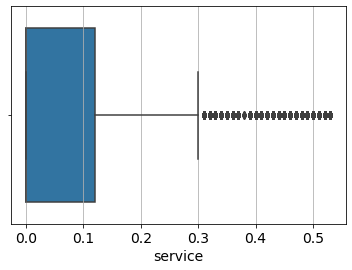

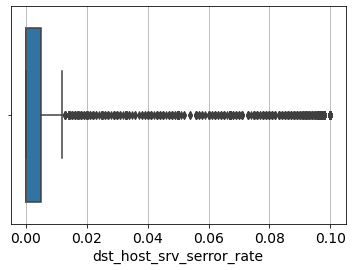

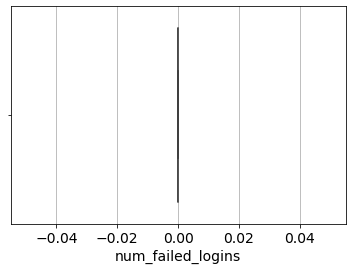

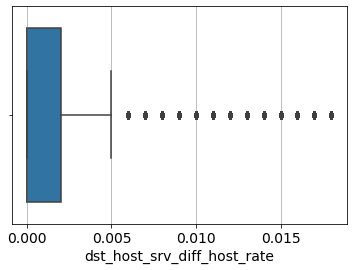

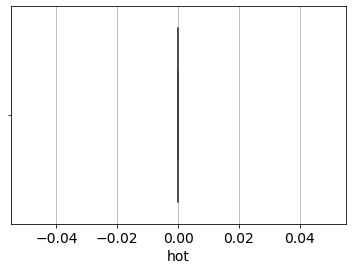

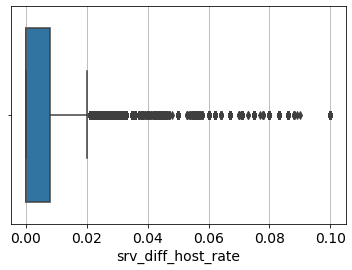

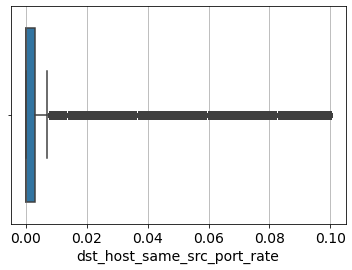

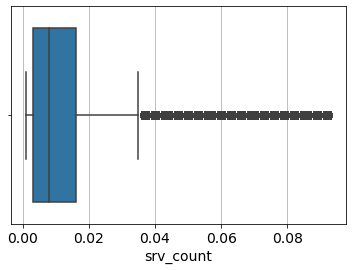

In [28]:
plt.figure(figsize = (10,10))
for i_var in data[num_cols].columns:
    sns.boxplot(data[i_var])
    plt.show()


In [29]:
#Univaraiate Analysis
#Data audit report
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [30]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [31]:
data[num_cols].apply(continuous_var_summary)

,logged_in,dst_host_srv_rerror_rate,is_guest_login,dst_host_diff_srv_rate,num_file_creations,root_shell,rerror_rate,srv_error_rate,urgent,num_compromised,count,num_access_files,dst_host_srv_count,duration,dst_host_count,dst_host_serror_rate,dst_host_rerror_rate,protocol_type,src_bytes,diff_srv_rate,dst_bytes,is_host_login,num_root,num_shells,same_srv_rate,dst_host_same_srv_rate,su_attempted,flag,serror_rate,srv_rerror_rate,service,dst_host_srv_serror_rate,num_failed_logins,dst_host_srv_diff_host_rate,hot,srv_diff_host_rate,dst_host_same_src_port_rate,srv_count
N,813576.000000,813576.000000,813576.0,813576.000000,813576.0,813576.0,813576.000000,813576.000000,813576.0,813576.0,813576.000000,813576.0,813576.000000,8.135760e+05,813576.000000,813576.000000,813576.000000,813576.000000,813576.000000,813576.000000,813576.000000,813576.0,813576.0,813576.0,813576.000000,813576.000000,813576.0,813576.000000,813576.000000,813576.000000,813576.000000,813576.000000,813576.0,813576.000000,813576.0,813576.000000,813576.000000,813576.000000
NMISS,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
SUM,52072.700000,4309.634000,0.0,2457.669000,0.0,0.0,4370.675000,20380.008000,0.0,0.0,47343.395000,0.0,131507.169000,2.221670e+01,135566.060000,20325.237000,4377.917000,379.780000,2519.126530,2097.263000,18657.369480,0.0,0.0,0.0,59675.959000,54296.713000,0.0,16443.530000,20302.026000,4331.083000,42641.710000,20317.479000,0.0,1293.403000,0.0,8216.612000,4809.428000,9748.294000
MEAN,0.064005,0.005297,0.0,0.003021,0.0,0.0,0.005372,0.025050,0.0,0.0,0.058192,0.0,0.161641,2.730747e-05,0.166630,0.024983,0.005381,0.000467,0.003096,0.002578,0.022933,0.0,0.0,0.0,0.073350,0.066738,0.0,0.020211,0.024954,0.005324,0.052413,0.024973,0.0,0.001590,0.0,0.010099,0.005911,0.011982
MEDIAN,0.100000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.010000,0.0,0.255000,0.000000e+00,0.255000,0.000000,0.000000,0.000000,0.002170,0.000000,0.003690,0.0,0.0,0.0,0.100000,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.008000
STD,0.047999,0.022119,0.0,0.005350,0.0,0.0,0.022374,0.043223,0.0,0.0,0.087452,0.0,0.111749,1.812351e-04,0.102126,0.043133,0.021962,0.002110,0.006809,0.006842,0.049807,0.0,0.0,0.0,0.041851,0.043466,0.0,0.030926,0.043144,0.022254,0.094342,0.043222,0.0,0.002787,0.0,0.023593,0.016930,0.013579
VAR,0.002304,0.000489,0.0,0.000029,0.0,0.0,0.000501,0.001868,0.0,0.0,0.007648,0.0,0.012488,3.284618e-08,0.010430,0.001860,0.000482,0.000004,0.000046,0.000047,0.002481,0.0,0.0,0.0,0.001752,0.001889,0.0,0.000956,0.001861,0.000495,0.008900,0.001868,0.0,0.000008,0.0,0.000557,0.000287,0.000184
MIN,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.001000,0.0,0.001000,0.000000e+00,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.001000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.001000
P1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.001000,0.0,0.001000,0.000000e+00,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.001000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.001000
P5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.001000,0.0,0.003000,0.000000e+00,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002000,0.001000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.001000


In [32]:
data[cat_col].apply(categorical_var_summary)

,attack_B,attack_M
N,813576.00,813576.00
NMISS,0.00,0.00
MODE,0.00,0.00
FREQ,576710.00,576710.00
PERCENT,70.89,70.89


In [33]:
data[num_cols].corr().abs()

,logged_in,dst_host_srv_rerror_rate,is_guest_login,dst_host_diff_srv_rate,num_file_creations,root_shell,rerror_rate,srv_error_rate,urgent,num_compromised,count,num_access_files,dst_host_srv_count,duration,dst_host_count,dst_host_serror_rate,dst_host_rerror_rate,protocol_type,src_bytes,diff_srv_rate,dst_bytes,is_host_login,num_root,num_shells,same_srv_rate,dst_host_same_srv_rate,su_attempted,flag,serror_rate,srv_rerror_rate,service,dst_host_srv_serror_rate,num_failed_logins,dst_host_srv_diff_host_rate,hot,srv_diff_host_rate,dst_host_same_src_port_rate,srv_count
logged_in,1.000000,0.305246,NaN,0.519937,NaN,NaN,0.315444,0.767338,NaN,NaN,0.755300,NaN,0.816045,0.064432,0.482424,0.767395,0.307816,0.295074,0.283609,0.437642,0.343244,NaN,NaN,NaN,0.839370,0.832409,NaN,0.869290,0.767022,0.308639,0.659672,0.768133,NaN,0.210764,NaN,0.187038,0.030712,0.037162
dst_host_srv_rerror_rate,0.305246,1.000000,NaN,0.253202,NaN,NaN,0.974565,0.138266,NaN,NaN,0.176004,NaN,0.215598,0.001568,0.049452,0.134851,0.963752,0.052995,0.102723,0.207805,0.104451,NaN,NaN,NaN,0.209324,0.199659,NaN,0.230881,0.135024,0.978896,0.151117,0.137888,NaN,0.173384,NaN,0.032546,0.061431,0.086293
is_guest_login,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_host_diff_srv_rate,0.519937,0.253202,NaN,1.000000,NaN,NaN,0.267790,0.428038,NaN,NaN,0.468033,NaN,0.655982,0.096581,0.245536,0.422684,0.287330,0.003197,0.017538,0.549818,0.240190,NaN,NaN,NaN,0.539625,0.661822,NaN,0.519506,0.419122,0.250881,0.455036,0.428910,NaN,0.202296,NaN,0.074309,0.065006,0.165541
num_file_creations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
root_shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rerror_rate,0.315444,0.974565,NaN,0.267790,NaN,NaN,1.000000,0.128797,NaN,NaN,0.180562,NaN,0.216627,0.000006,0.051111,0.133887,0.971010,0.053086,0.106370,0.228454,0.108066,NaN,NaN,NaN,0.211640,0.201198,NaN,0.243192,0.134231,0.984793,0.150525,0.128303,NaN,0.163553,NaN,0.030990,0.063483,0.090186
srv_error_rate,0.767338,0.138266,NaN,0.428038,NaN,NaN,0.128797,1.000000,NaN,NaN,0.789060,NaN,0.774639,0.086873,0.491249,0.995388,0.132127,0.128243,0.261730,0.381311,0.263429,NaN,NaN,NaN,0.894357,0.824282,NaN,0.927208,0.997108,0.138065,0.662920,0.998627,NaN,0.325571,NaN,0.244528,0.193029,0.055409
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_compromised,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


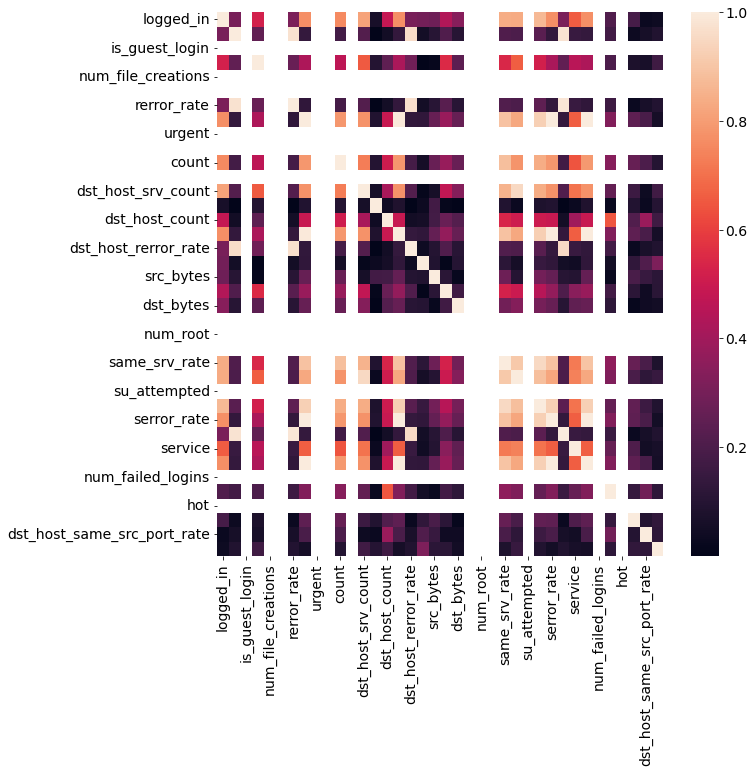

In [34]:
#BiVariate Analysis
#correlation between numerical variables
plt.figure(figsize =(10,10))
fig = sns.heatmap(data[num_cols].corr().abs())
plt.show(fig)

In [35]:
#CV calculation
#Correlation between x variables

(data.mean()/(data.std()+((0.01)**10))).sort_values()

is_guest_login                 0.000000
is_host_login                  0.000000
num_outbound_cmds              0.000000
num_access_files               0.000000
num_shells                     0.000000
num_file_creations             0.000000
land                           0.000000
wrong_fragment                 0.000000
urgent                         0.000000
hot                            0.000000
num_failed_logins              0.000000
num_root                       0.000000
num_compromised                0.000000
root_shell                     0.000000
su_attempted                   0.000000
duration                       0.150674
protocol_type                  0.221283
srv_rerror_rate                0.239219
dst_host_srv_rerror_rate       0.239488
rerror_rate                    0.240108
dst_host_rerror_rate           0.245022
dst_host_same_src_port_rate    0.349176
diff_srv_rate                  0.376749
srv_diff_host_rate             0.428069
src_bytes                      0.454767


In [36]:
# % of value counts in data
pd.DataFrame(data['attack_B'].value_counts()*100/data['attack_B'].value_counts().sum()).reset_index()

,index,attack_B
0,0,70.885818
1,1,29.114182


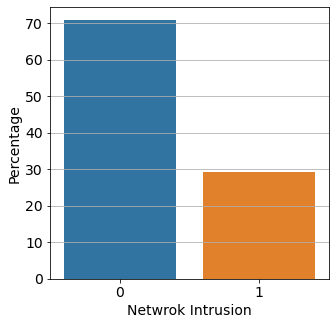

In [37]:
plt.figure(figsize =(5,5))
sns.barplot(data =pd.DataFrame(data['attack_B'].value_counts()*100/data['attack_B'].value_counts().sum()).reset_index(),x = 'index',y = 'attack_B')
plt.xlabel('Netwrok Intrusion')
plt.ylabel('Percentage')
plt.show()

In [38]:
X = data[data.columns.difference(['attack_B','attack_M'])]
y = data['attack_B']


# 3.  Feature Engineering


In [39]:
#removing variables with cv<0.01 and based on EDA
c =[]
for i_var in X[num_cols].columns:
    if len(X[i_var].unique())<2 :
        c.append(i_var)
            


X = X.drop(columns = c)





    

## 3.1 Univariate Regression

In [40]:
#1.Using univariate logistic regression to find best features
auc_df = pd.DataFrame()
for col in X.columns:
    model = LogisticRegression(n_jobs= -1).fit(X[[col]],y)
    auc = metrics.roc_auc_score(y, model.predict(X[[col]]))
    temp = pd.DataFrame([col, auc]).T
    auc_df = pd.concat([auc_df, temp], axis=0)

#Extracting important features
auc_df.columns = ['feature', 'auc']
auc_df.sort_values(by='auc', inplace=True, ascending=False)
imp_vars_AUC = list(auc_df.head(15)['feature'])


In [41]:
imp_vars_AUC

['same_srv_rate',
 'flag',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'service',
 'logged_in',
 'count',
 'dst_bytes',
 'dst_host_srv_serror_rate',
 'srv_error_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate']

## 3.2 RFE

In [42]:
#### RFE


classifier = RandomForestClassifier(n_jobs=-1)
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(X,y )

imp_vars_RFE = list(X.columns[rfe.support_])


In [43]:
imp_vars_RFE

['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'same_srv_rate',
 'service',
 'src_bytes',
 'srv_error_rate']

## 3.3 Select K Best

In [44]:
SKB = SelectKBest(f_classif,k=10)
SKB.fit(X,y)

imp_vars_SKB = list(X.columns[SKB.get_support()])


In [45]:
imp_vars_SKB

['count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'flag',
 'logged_in',
 'same_srv_rate',
 'serror_rate',
 'srv_error_rate']

In [46]:
imp_vars = list(set(imp_vars_RFE+imp_vars_SKB+imp_vars_AUC))


In [47]:
imp_vars

['logged_in',
 'dst_host_srv_serror_rate',
 'service',
 'dst_host_srv_count',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'src_bytes',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'dst_bytes',
 'flag',
 'srv_error_rate',
 'count']

## VIF

In [48]:
#VIF
#### VIF
feature=imp_vars.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(X[feature].values,i) for i in range(X[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(X[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])

In [49]:
feature

['dst_bytes',
 'src_bytes',
 'diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'service',
 'dst_host_serror_rate',
 'count',
 'dst_host_count',
 'logged_in']

In [50]:
feature = ['dst_bytes',
 'src_bytes',
 'diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_diff_srv_rate',
 'service',
 'logged_in',
 'count',
 'dst_host_count']

In [51]:
X = X[list(feature)]


## Train Test Split

In [52]:
#train_test split
#use stratify?
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.15,random_state = 324,stratify=y)

In [53]:
train_X.shape

(691539, 10)

In [54]:
train_y.shape

(691539,)

In [55]:
test_X.shape

(122037, 10)

In [56]:
test_y.shape

(122037,)

In [57]:
train_y.value_counts()*100/(train_y.value_counts().sum())

0    70.885807
1    29.114193
Name: attack_B, dtype: float64

In [58]:
test_y.value_counts()*100/(test_y.value_counts().sum())

0    70.885879
1    29.114121
Name: attack_B, dtype: float64

# Models

In [59]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691539 entries, 257115 to 509093
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   dst_bytes                    691539 non-null  float64
 1   src_bytes                    691539 non-null  float64
 2   diff_srv_rate                691539 non-null  float64
 3   dst_host_srv_diff_host_rate  691539 non-null  float64
 4   dst_host_srv_rerror_rate     691539 non-null  float64
 5   dst_host_diff_srv_rate       691539 non-null  float64
 6   service                      691539 non-null  float64
 7   logged_in                    691539 non-null  float64
 8   count                        691539 non-null  float64
 9   dst_host_count               691539 non-null  float64
dtypes: float64(10)
memory usage: 58.0 MB


## Logistic Regression using OLS 

In [60]:
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)

In [61]:
ta='attack_B~'+'+'.join(feature)
ta

'attack_B~dst_bytes+src_bytes+diff_srv_rate+dst_host_srv_diff_host_rate+dst_host_srv_rerror_rate+dst_host_diff_srv_rate+service+logged_in+count+dst_host_count'

In [62]:
logreg = smf.logit(formula=ta, data=train)
result = logreg.fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 0.025608
         Iterations 84


In [63]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               attack_B   No. Observations:               691539
Model:                          Logit   Df Residuals:                   691528
Method:                           MLE   Df Model:                           10
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.9575
Time:                        15:04:11   Log-Likelihood:                -17709.
converged:                       True   LL-Null:                   -4.1712e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.5660      0.087    -63.774      0.000      -5.737      -5.395
dst_bytes                    -326.6886     26.620    -12.272      0.000    -378.

In [64]:
print(result.summary2())

                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.958      
Dependent Variable:        attack_B               AIC:                    35439.2817 
Date:                      2022-11-12 15:04       BIC:                    35565.1952 
No. Observations:          691539                 Log-Likelihood:         -17709.    
Df Model:                  10                     LL-Null:                -4.1712e+05
Df Residuals:              691528                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            84.0000                                                   
-------------------------------------------------------------------------------------
                              Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
-------------------------------------------------------------------------------------
Inte

In [65]:
# dst_host_srv_rerror_rate has p value greater than 0.05 so we drop that variable

In [66]:
feature.remove('dst_host_srv_rerror_rate')
ta_n='attack_B~'+'+'.join(feature)

In [67]:
train = train[train.columns.difference(['dst_host_srv_rerror_rate'])]

In [68]:
len(train.columns)

10

In [69]:
train.columns

Index(['attack_B', 'count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'logged_in',
       'service', 'src_bytes'],
      dtype='object')

In [70]:
logreg_final = smf.logit(formula=ta_n, data=train)
result = logreg_final.fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 0.025610
         Iterations 68


In [71]:
print(result.summary2())

                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.958      
Dependent Variable:        attack_B               AIC:                    35440.4661 
Date:                      2022-11-12 15:04       BIC:                    35554.9328 
No. Observations:          691539                 Log-Likelihood:         -17710.    
Df Model:                  9                      LL-Null:                -4.1712e+05
Df Residuals:              691529                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            68.0000                                                   
-------------------------------------------------------------------------------------
                              Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
-------------------------------------------------------------------------------------
Inte

In [72]:
train_gini = 2*metrics.roc_auc_score(train['attack_B'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['attack_B'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['attack_B'], result.predict(train))
test_auc = metrics.roc_auc_score(test['attack_B'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9985203230297655
The Gini Index for the model built on the Test Data is :  0.9981278540552454
The AUC for the model built on the Train Data is :  0.9992601615148827
The AUC for the model built on the Test Data is :  0.9990639270276227


In [73]:
## Train Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['attack_B']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
257115,0,3.394886e-08
561520,0,5.271946e-12
187908,1,9.720152e-01
507190,0,2.713671e-11
408078,0,1.293890e-11


In [74]:
## Test Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['attack_B']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
49134,0,1.227723e-08
375498,0,1.328353e-12
28173,0,5.394904e-22
255899,0,1.304044e-18
262558,0,6.195096e-10


In [75]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [76]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.291142
0,0.020408,0.998455,0.934207,0.952912
0,0.040816,0.998296,0.969090,0.977593
0,0.061224,0.998187,0.978254,0.984057
0,0.081633,0.997954,0.981865,0.986549
0,0.102041,0.997805,0.983984,0.988008
0,0.122449,0.997690,0.985594,0.989116
0,0.142857,0.997586,0.986963,0.990056
0,0.163265,0.997487,0.988252,0.990940
0,0.183673,0.993245,0.989372,0.990499


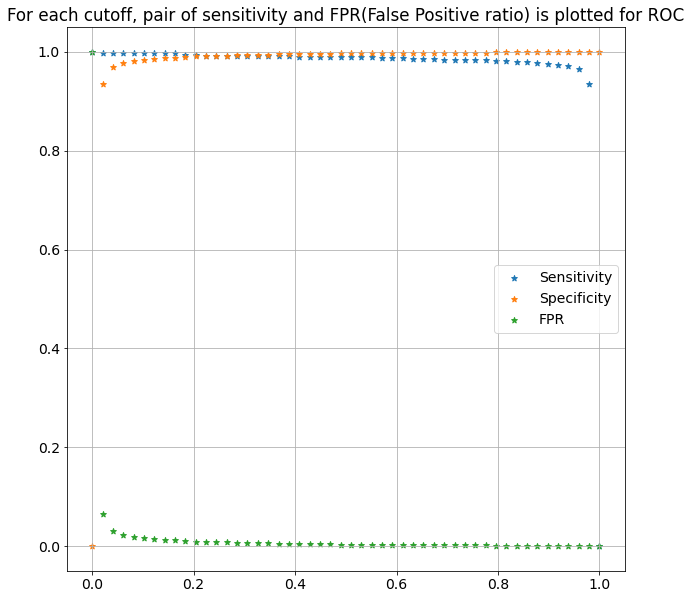

In [77]:
plt.subplots(figsize=(10,10))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR(False Positive ratio) is plotted for ROC')
plt.legend()

In [78]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.291142
0,0.020408,0.998455,0.934207,0.952912
0,0.040816,0.998296,0.969090,0.977593
0,0.061224,0.998187,0.978254,0.984057
0,0.081633,0.997954,0.981865,0.986549


In [79]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [80]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.291142,1.000000
0,0.020408,0.998455,0.934207,0.952912,1.932662
0,0.040816,0.998296,0.969090,0.977593,1.967387
0,0.061224,0.998187,0.978254,0.984057,1.976441
0,0.081633,0.997954,0.981865,0.986549,1.979818


In [81]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.291142,1.000000
0,0.020408,0.998455,0.934207,0.952912,1.932662
0,0.040816,0.998296,0.969090,0.977593,1.967387
0,0.061224,0.998187,0.978254,0.984057,1.976441
0,0.081633,0.997954,0.981865,0.986549,1.979818


In [82]:
#Cut-off based on highest sum(sensitivity+specicity)  
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.510204,0.989709,0.997011,0.994885,1.98672


In [83]:
#Cut-off based on highest accuracy  
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.530612,0.989441,0.997197,0.994939,1.986638


In [84]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.291142,1.0


In [85]:
#Choosen Best Cut-off is 0.428571 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.510204 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.510204 else 0)

In [86]:
train_predict.head()

,actual,prob,predicted
257115,0,3.394886e-08,0
561520,0,5.271946e-12,0
187908,1,9.720152e-01,1
507190,0,2.713671e-11,0
408078,0,1.293890e-11,0


In [87]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9948853210014186
The overall accuracy score for the Test Data  is :  0.994755688848464


In [88]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    490203
           1       0.99      0.99      0.99    201336

    accuracy                           0.99    691539
   macro avg       0.99      0.99      0.99    691539
weighted avg       0.99      0.99      0.99    691539



In [89]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86507
           1       0.99      0.99      0.99     35530

    accuracy                           0.99    122037
   macro avg       0.99      0.99      0.99    122037
weighted avg       0.99      0.99      0.99    122037



## Logistic Regression with ML

In [90]:
logit_model = LogisticRegression().fit(train_X,train_y)

In [91]:
train_pred = logit_model.predict(train_X)
test_pred = logit_model.predict(test_X)
train_pred_prob = logit_model.predict(train_X)
test_pred = logit_model.predict(test_X)

In [92]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    490203
           1       0.98      0.98      0.98    201336

    accuracy                           0.99    691539
   macro avg       0.98      0.99      0.99    691539
weighted avg       0.99      0.99      0.99    691539



In [93]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     86507
           1       0.98      0.98      0.98     35530

    accuracy                           0.99    122037
   macro avg       0.98      0.99      0.99    122037
weighted avg       0.99      0.99      0.99    122037



In [94]:
metrics.roc_auc_score(train_y,train_pred)

0.9865532437417233

In [95]:
metrics.roc_auc_score(test_y,test_pred)

0.9864666202092143

In [96]:
cm_train =  pd.crosstab(train_y,train_pred)

cm_test  =  pd.crosstab(test_y,test_pred)

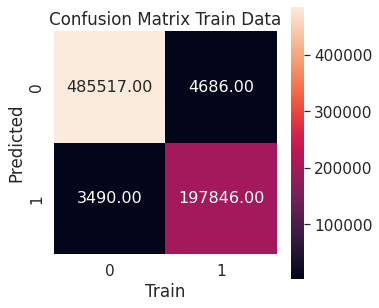

In [97]:
#Displaying confusion matrix
#Other option :- from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

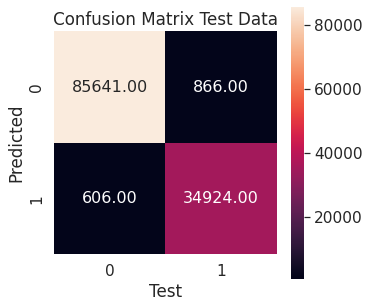

In [98]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

## K Nearest Neighbour Classification

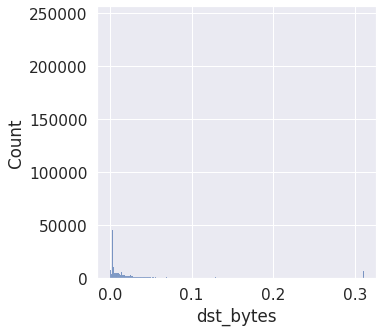

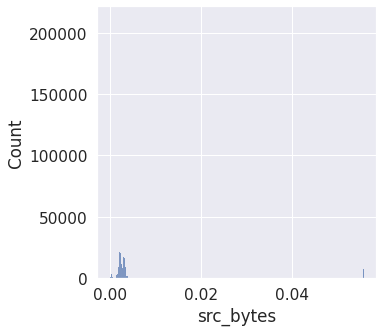

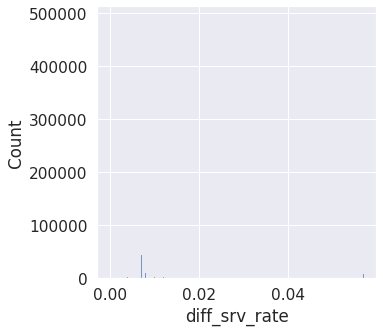

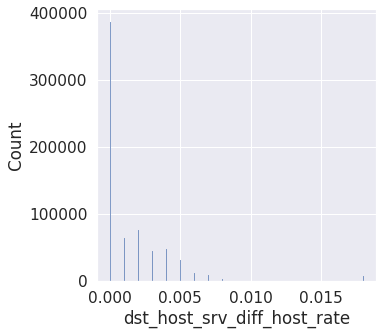

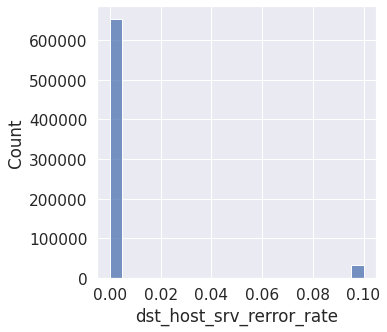

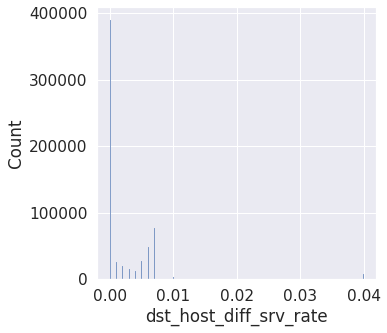

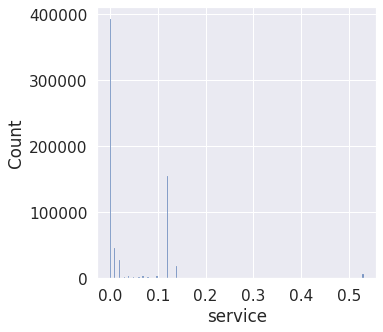

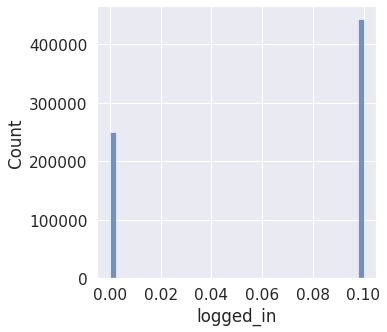

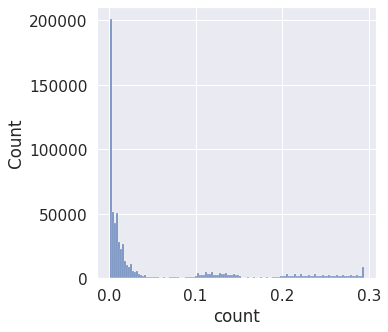

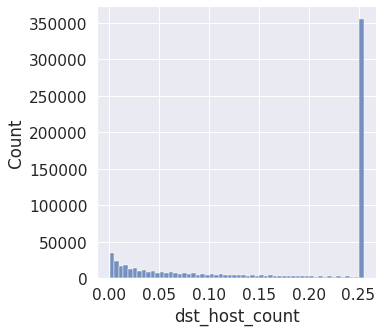

In [99]:
for i in train_X.columns:
    plt.figure(figsize= (5,5))
    sns.histplot(train_X[i])
    plt.show()

In [100]:
from sklearn.preprocessing import PowerTransformer

In [101]:
#normalising and standardising X_vars using power transformer
pt= PowerTransformer(method='yeo-johnson',standardize=True, copy=True)
train_X_std = pd.DataFrame(pt.fit_transform(train_X),columns = train_X.columns)

In [102]:
test_X_std = pd.DataFrame(pt.transform(test_X),columns = test_X.columns)

In [103]:
train_X_std.describe()

,dst_bytes,src_bytes,diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_diff_srv_rate,service,logged_in,count,dst_host_count
count,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05,6.915390e+05
mean,1.896729e-16,-2.408619e-16,5.383997e-17,8.690429e-17,1.618282e-17,4.758262e-16,1.398195e-16,3.557137e-16,-2.253008e-16,1.749080e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-8.591056e-01,-1.166618e+00,-6.413683e-01,-8.157795e-01,-2.593270e-01,-8.114431e-01,-7.543841e-01,-1.333509e+00,-8.807464e-01,-1.442381e+00
25%,-8.591056e-01,-1.166618e+00,-6.413683e-01,-8.157795e-01,-2.593270e-01,-8.114431e-01,-7.543841e-01,-1.333509e+00,-7.965124e-01,-1.156154e+00
50%,-4.897964e-01,1.946441e-01,-6.413683e-01,-8.157795e-01,-2.593270e-01,-8.114431e-01,-7.543841e-01,7.499011e-01,-5.231119e-01,8.996636e-01
75%,6.467453e-01,5.600916e-01,1.305459e+00,7.544691e-01,-2.593270e-01,1.159973e+00,1.373056e+00,7.499011e-01,1.251265e+00,8.996636e-01
max,2.151181e+00,2.584482e+00,2.095157e+00,2.002328e+00,4.091847e+00,2.073209e+00,1.884279e+00,7.499011e-01,1.761511e+00,8.996636e-01


In [104]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=-1)
knn.fit(train_X_std,train_y)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [105]:
train_pred = knn.predict(train_X_std)

In [106]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    490203
           1       1.00      1.00      1.00    201336

    accuracy                           1.00    691539
   macro avg       1.00      1.00      1.00    691539
weighted avg       1.00      1.00      1.00    691539



In [107]:
metrics.roc_auc_score(train_y,train_pred)

0.9999950331783685

In [108]:
test_pred = knn.predict(test_X_std)


In [109]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86507
           1       1.00      1.00      1.00     35530

    accuracy                           1.00    122037
   macro avg       1.00      1.00      1.00    122037
weighted avg       1.00      1.00      1.00    122037



In [110]:
metrics.roc_auc_score(test_y,test_pred)

0.9997401588904216

In [111]:
cm_train =  pd.crosstab(train_y,train_pred)

cm_test  =  pd.crosstab(test_y,test_pred)

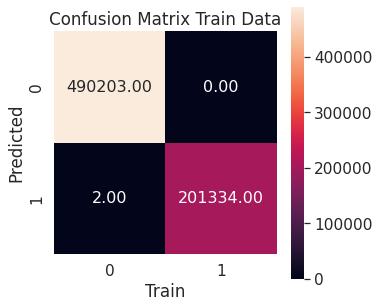

In [112]:
#Displaying confusion matrix
#Other option :- from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

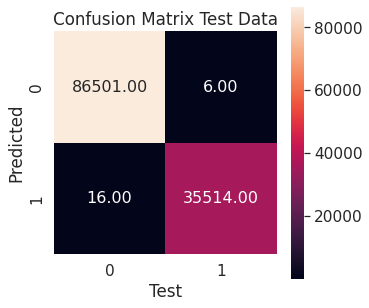

In [113]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

## RandomForest Model

In [114]:
r_clf = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=5, min_samples_split=30,min_samples_leaf =5, max_features="auto",bootstrap=True, oob_score=True, n_jobs=-1, random_state=999, verbose=1)

In [115]:
r_clf.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.9s finished


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=30,
                       n_jobs=-1, oob_score=True, random_state=999, verbose=1)

In [116]:
train_pred = r_clf.predict(train_X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.5s finished


In [117]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    490203
           1       1.00      1.00      1.00    201336

    accuracy                           1.00    691539
   macro avg       1.00      1.00      1.00    691539
weighted avg       1.00      1.00      1.00    691539



In [118]:
metrics.roc_auc_score(train_y,train_pred)

0.9987828176223048

In [119]:
test_pred = r_clf.predict(test_X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


In [120]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86507
           1       1.00      1.00      1.00     35530

    accuracy                           1.00    122037
   macro avg       1.00      1.00      1.00    122037
weighted avg       1.00      1.00      1.00    122037



In [121]:
metrics.roc_auc_score(test_y,test_pred)

0.9987626144315608

In [122]:
cm_train =  pd.crosstab(train_y,train_pred)

cm_test  =  pd.crosstab(test_y,test_pred)

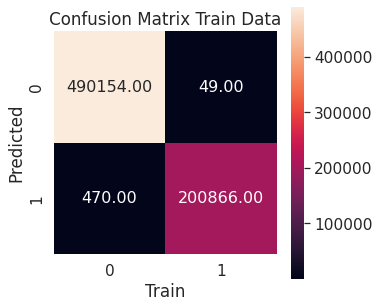

In [123]:
#Displaying confusion matrix
#Other option :- from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

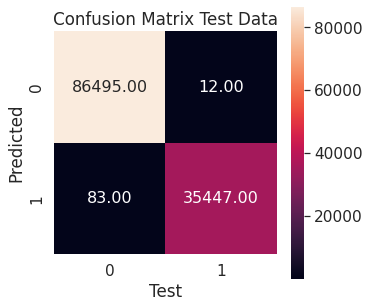

In [124]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Test Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

## XGBoost Classifier

In [125]:
#base model
xgb_model = XGBClassifier(n_jobs=-1, random_state=142)
xgb_model.fit(train_X,train_y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=142, reg_alpha=0, reg_lambda=1, ...)

In [126]:
xgb_model.fit(train_X,train_y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=142, reg_alpha=0, reg_lambda=1, ...)

In [127]:
train_pred = xgb_model.predict(train_X)
test_pred = xgb_model.predict(test_X)

In [128]:
cm_train =  pd.crosstab(train_y,train_pred)

cm_test  =  pd.crosstab(test_y,test_pred)

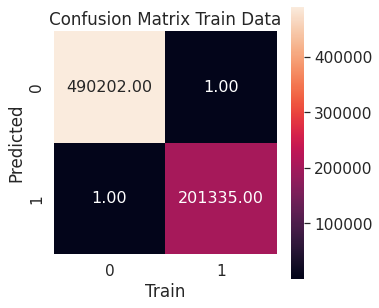

In [129]:
#Displaying confusion matrix
#Other option :- from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_train,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Train')
plt.ylabel('Predicted')
plt.show()

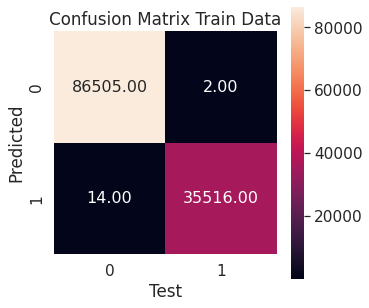

In [130]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4) 
sns.heatmap(cm_test,annot = True,annot_kws = {"size":16},square =True,fmt = '.2f')
plt.title('Confusion Matrix Train Data')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

In [131]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    490203
           1       1.00      1.00      1.00    201336

    accuracy                           1.00    691539
   macro avg       1.00      1.00      1.00    691539
weighted avg       1.00      1.00      1.00    691539



In [132]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86507
           1       1.00      1.00      1.00     35530

    accuracy                           1.00    122037
   macro avg       1.00      1.00      1.00    122037
weighted avg       1.00      1.00      1.00    122037



In [133]:
metrics.roc_auc_score(train_pred,train_y)

0.9999964966035864

In [134]:
metrics.roc_auc_score(train_pred,train_y)

0.9999964966035864

## Saving the models

In [135]:
cd /kaggle/working

/kaggle/working


In [136]:
import pickle
PIK = "BC_models.pkl"
model = [xgb_model, r_clf,knn,logit_model,logreg_final]
with open(PIK, "wb") as f:
    pickle.dump(model, f)

### XG Boost model and KNN models gives the best f1 score, accuracy and ROC AUC score